In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from project import handling

In [28]:
data = pd.read_csv('train.csv')

In [29]:
handling(data)

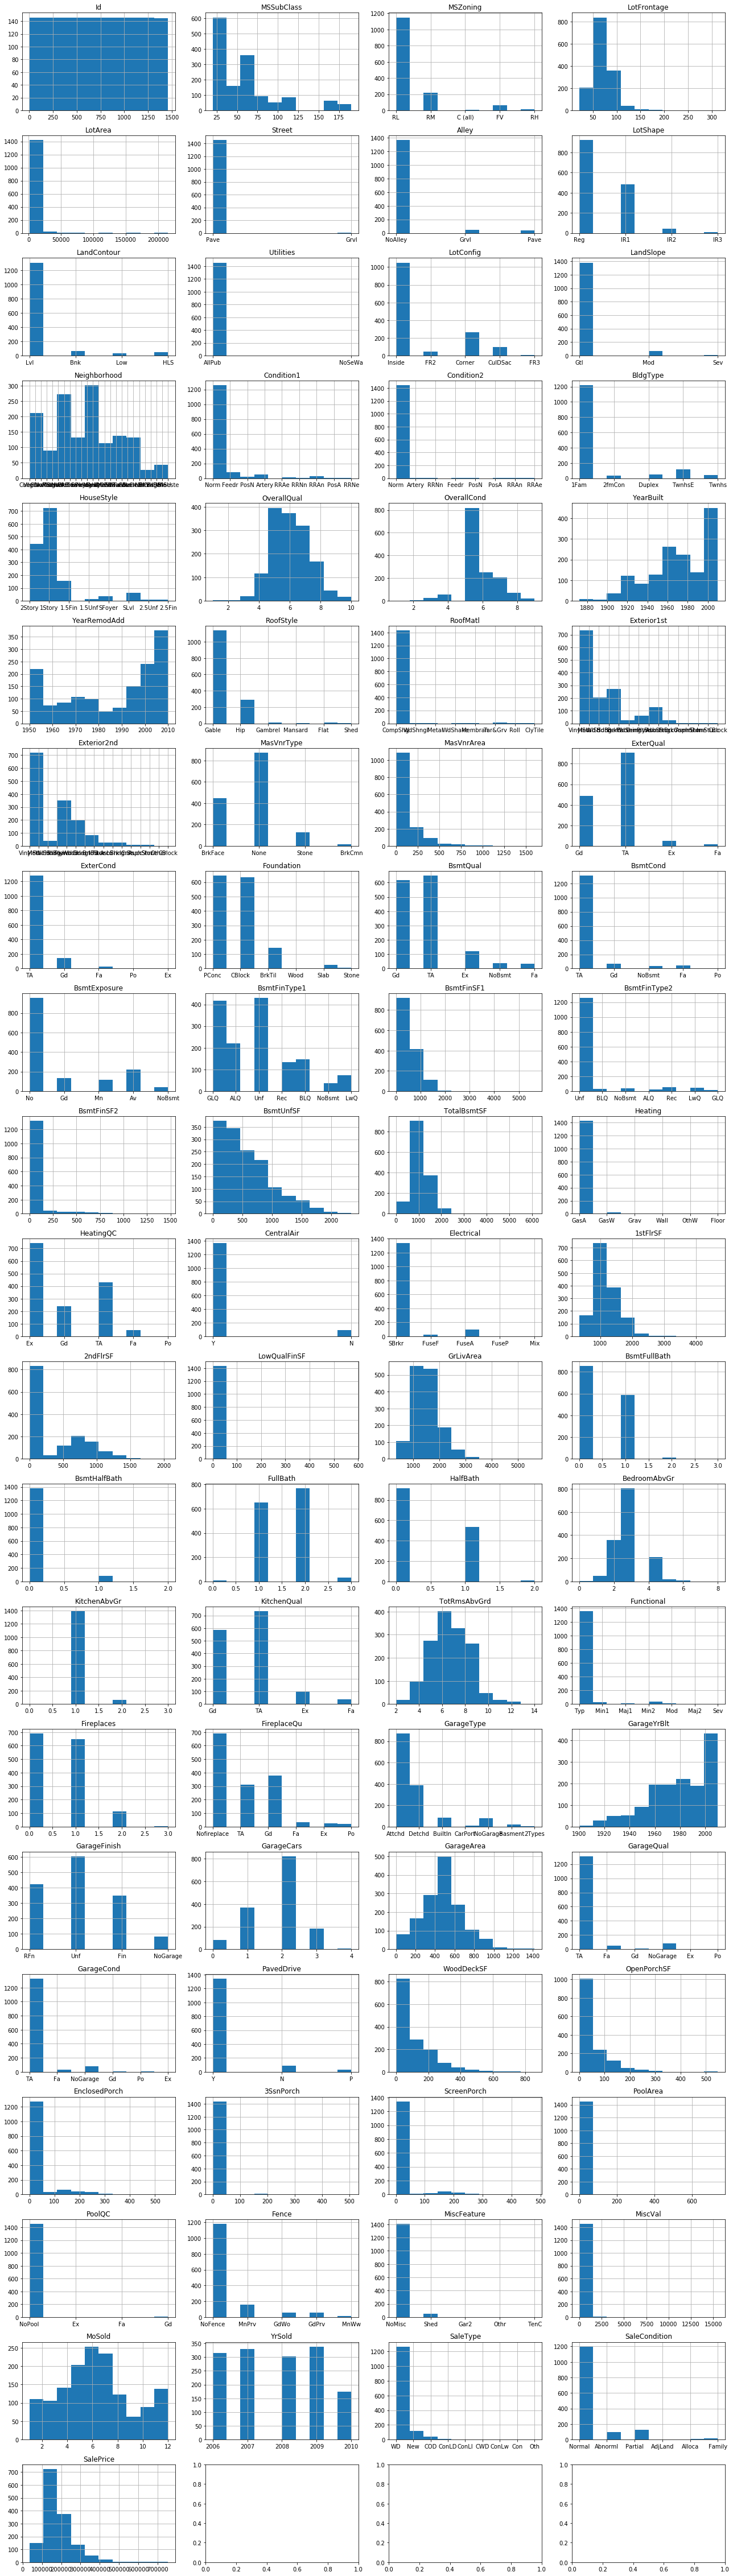

In [30]:
def hist_data_columns(data, columns=data.columns, ncols=4):
    nrows = len(columns) // ncols + 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(18,nrows*3))
    for ax, column in zip(axs.ravel(), columns):
        data[column].hist(ax=ax)
        ax.set_title(column)
    
    fig.tight_layout()
    
hist_data_columns(data)

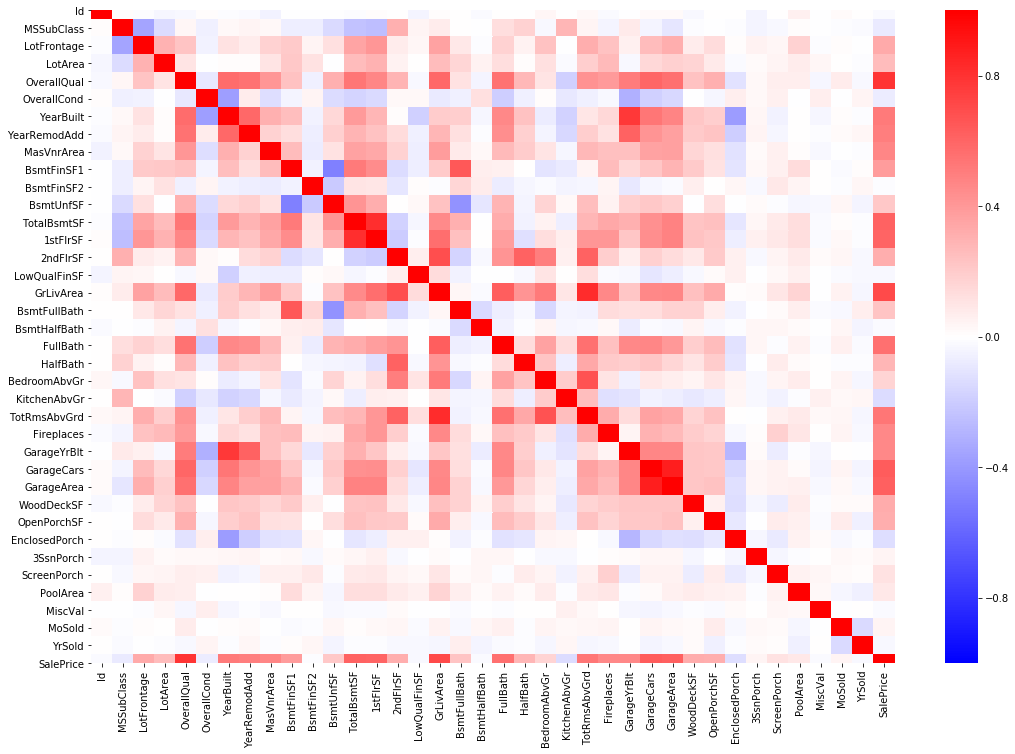

In [32]:
def heatmap(data):
    plt.figure(figsize=(18,12))
    corr = data.corr()
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='bwr')
    
heatmap(data)